In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

epi = pd.read_csv("C:/Users/goeun/OneDrive/바탕 화면/Project/covid/epidemiology.csv")
vacc = pd.read_csv("C:/Users/goeun/OneDrive/바탕 화면/Project/covid/vaccinations.csv")

print("Epidemiology shape:", epi.shape)
print("Vaccinations shape:", vacc.shape)

print("\n--- Epidemiology info ---")
print(epi.info())
print(epi.head())

print("\n--- Vaccinations info ---")
print(vacc.info())
print(vacc.head())

Epidemiology shape: (12525825, 10)
Vaccinations shape: (2545118, 32)

--- Epidemiology info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12525825 entries, 0 to 12525824
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   location_key          object 
 2   new_confirmed         float64
 3   new_deceased          float64
 4   new_recovered         float64
 5   new_tested            float64
 6   cumulative_confirmed  float64
 7   cumulative_deceased   float64
 8   cumulative_recovered  float64
 9   cumulative_tested     float64
dtypes: float64(8), object(2)
memory usage: 955.6+ MB
None
         date location_key  new_confirmed  new_deceased  new_recovered  \
0  2020-01-01           AD            0.0           0.0            NaN   
1  2020-01-02           AD            0.0           0.0            NaN   
2  2020-01-03           AD            0.0           0.0            NaN   
3  2020-01-04 

In [3]:
# ---------------------------
# Checking Missing Value
# ---------------------------
print("Missing values (Epidemiology):")
print(epi.isna().sum())

print("\nMissing values (Vaccinations):")
print(vacc.isna().sum())

Missing values (Epidemiology):
date                          0
location_key                987
new_confirmed             50025
new_deceased             858687
new_recovered           8545363
new_tested              9331336
cumulative_confirmed     198780
cumulative_deceased     1051000
cumulative_recovered    8534668
cumulative_tested       9512905
dtype: int64

Missing values (Vaccinations):
date                                                   0
location_key                                         158
new_persons_vaccinated                           1612231
cumulative_persons_vaccinated                    1658214
new_persons_fully_vaccinated                       19651
cumulative_persons_fully_vaccinated                18658
new_vaccine_doses_administered                   1604390
cumulative_vaccine_doses_administered            1647958
new_persons_vaccinated_pfizer                    2533141
cumulative_persons_vaccinated_pfizer             2533141
new_persons_fully_vaccinated_pfize

In [4]:
# ---------------------------
# Check unique countries/regions
# ---------------------------
print("Unique countries in epidemiology:")
print(epi['location_key'].nunique())
print(epi['location_key'].unique()[:20])  # first 20 rows

print("\nUnique countries in vaccinations:")
print(vacc['location_key'].nunique())
print(vacc['location_key'].unique()[:20])

Unique countries in epidemiology:
20905
['AD' 'AE' 'AF' 'AF_BAL' 'AF_BAM' 'AF_BDG' 'AF_BDS' 'AF_BGL' 'AF_DAY'
 'AF_FRA' 'AF_FYB' 'AF_GHA' 'AF_GHO' 'AF_HEL' 'AF_HER' 'AF_JOW' 'AF_KAB'
 'AF_KAN' 'AF_KAP' 'AF_KDZ']

Unique countries in vaccinations:
5115
['AD' 'AE' 'AF' 'AG' 'AI' 'AL' 'AM' 'AO' 'AR' 'AR_A' 'AR_A_007' 'AR_A_014'
 'AR_A_021' 'AR_A_028' 'AR_A_035' 'AR_A_042' 'AR_A_049' 'AR_A_056'
 'AR_A_070' 'AR_A_077']


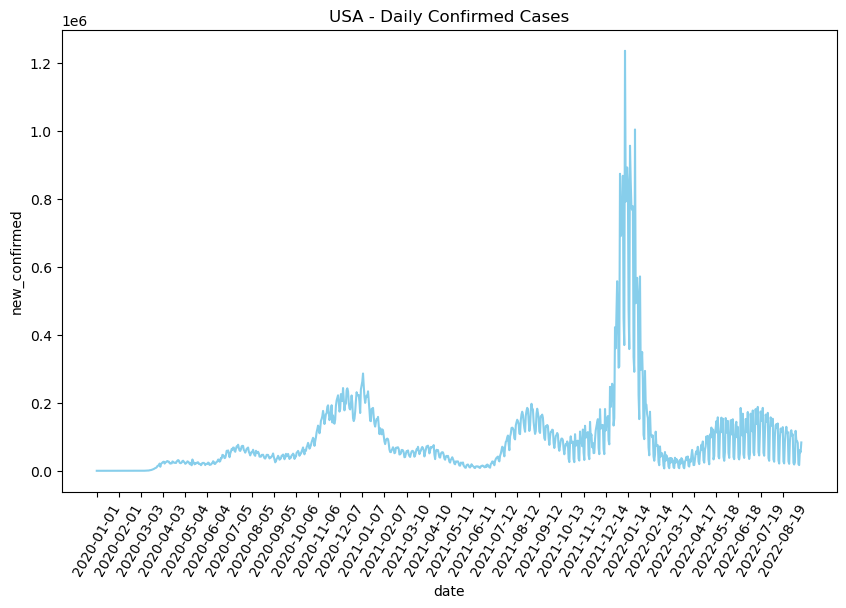

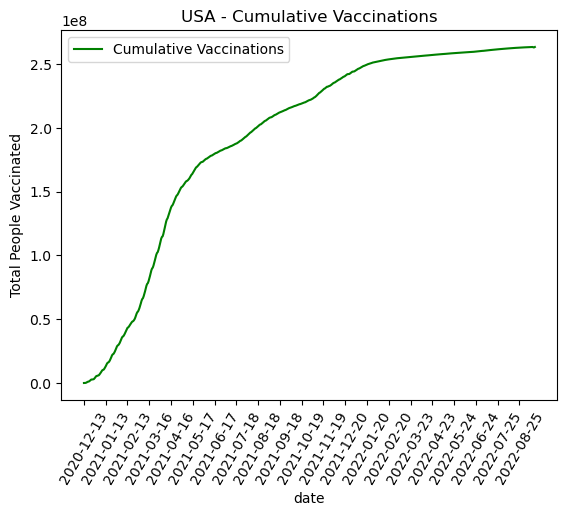

In [5]:
# ---------------------------
# Examine time series for the United States
# ---------------------------
usa_epi = epi[epi['location_key'] == 'US']
usa_vacc = vacc[vacc['location_key'] == 'US']

#print("USA epidemiology head:")
#print(usa_epi.head())

# Time series plot of confirmed cases
plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='new_confirmed', data=usa_epi, color='skyblue')
plt.title("USA - Daily Confirmed Cases")
#plt.xlabel("Date")
#plt.ylabel("Cases")
plt.xticks(usa_epi['date'][::31], rotation=60)
plt.show()

# Time series plot of vaccinations
sns.lineplot(
    x='date', 
    y='cumulative_persons_vaccinated', 
    data=usa_vacc, 
    label='Cumulative Vaccinations',
    color='green'
)

plt.title("USA - Cumulative Vaccinations")
#plt.xlabel("Date")
plt.ylabel("Total People Vaccinated")
plt.xticks(usa_vacc['date'][::31], rotation=60) # 1 month interval x-axis
#plt.legend()
plt.show()

In [6]:
# ---------------------------
# Check US stats
# ---------------------------
# Check missing values
#print("USA epidemiology missing value")
#print(usa_epi.isna().sum())

print("\nUSA epidemiology stats:")
print(usa_epi[['new_confirmed','new_deceased']].describe())

print("\nUSA vaccination stats:")
print(usa_vacc[['cumulative_persons_vaccinated']].describe())


USA epidemiology stats:
       new_confirmed  new_deceased
count   9.880000e+02     988.00000
mean    9.290546e+04    1000.02834
std     1.264354e+05     865.17391
min     0.000000e+00       0.00000
25%     2.699375e+04     379.25000
50%     5.583850e+04     752.00000
75%     1.194122e+05    1419.50000
max     1.235521e+06    4133.00000

USA vaccination stats:
       cumulative_persons_vaccinated
count                   6.430000e+02
mean                    1.941675e+08
std                     7.921049e+07
min                     3.081700e+04
25%                     1.693525e+08
50%                     2.217532e+08
75%                     2.564294e+08
max                     2.634156e+08


In [7]:
latest_per_country = epi.sort_values('date').groupby('location_key').tail(1) #groub by location and sort by date, tail -> store latest date data

conn = sqlite3.connect(":memory:")
latest_per_country.to_sql("covid_latest", conn, index=False, if_exists="replace")

query = """
SELECT location_key, cumulative_confirmed, cumulative_deceased
FROM covid_latest
ORDER BY cumulative_confirmed DESC
LIMIT 11; -- collected upper 11 datas since top 8 is duplicated with top 5
"""
top10 = pd.read_sql(query, conn)
#print(len(top10))
#print(top10)

# Remove 'GB_ENG'
top10 = top10[top10['location_key'] != 'GB_ENG']
print(len(top10))
print(top10)

10
   location_key  cumulative_confirmed  cumulative_deceased
0            US            92440495.0            1005195.0
1            IN            44516479.0             528250.0
2            BR            34568833.0             685203.0
3            DE            32604993.0             148728.0
4            KR            24264470.0              27665.0
5            GB            23554971.0             189026.0
6            IT            22114423.0             176464.0
7            RU            20265004.0             385727.0
9            JP            19868288.0              43339.0
10           TR            16852382.0             101068.0


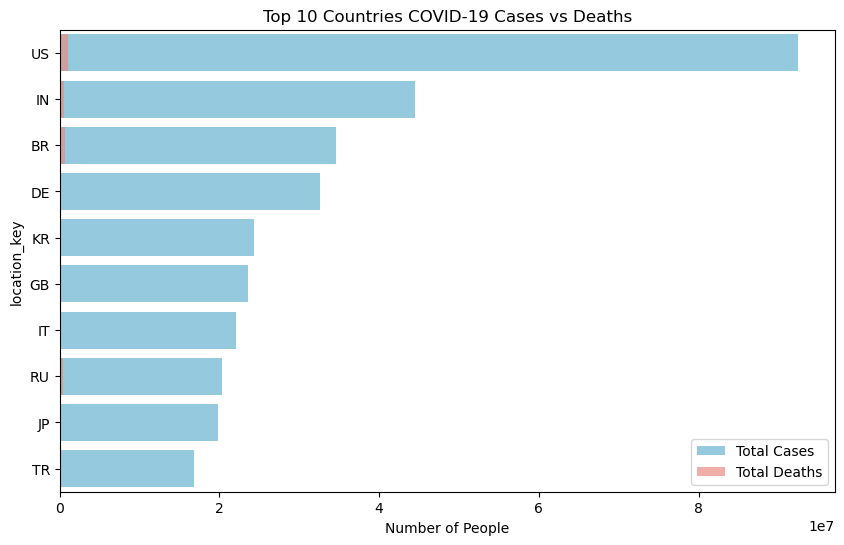

In [9]:
# ---------------------------
# Visualization: top 10 countries cases vs deaths
# ---------------------------
plt.figure(figsize=(10,6))
sns.barplot(x="cumulative_confirmed", y="location_key", data=top10, color='skyblue', label="Total Cases")
sns.barplot(x="cumulative_deceased", y="location_key", data=top10, color='salmon', alpha=0.7, label="Total Deaths")
plt.xlabel("Number of People")
latest_date = epi['date'].max()
plt.title(f"Top 10 Countries COVID-19 Cases vs Deaths")
plt.legend()
plt.show()